# Homework solution: Multi-layer perceptron credit dataset





## Load the dataset

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('credit_data.csv')

In [3]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
dataset.shape

(2000, 5)

In [6]:
# dataset.isna().sum()
dataset.isnull().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

In [7]:
dataset = dataset.dropna()
dataset.shape

(1997, 5)

In [15]:
inputs = dataset.iloc[:, 1:4].values

In [16]:
inputs

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [17]:
len(inputs)

1997

In [18]:
inputs.shape

(1997, 3)

In [19]:
max(inputs[0])

66155.9250950813

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inputs = scaler.fit_transform(inputs)

In [21]:
max(inputs[0]), min(inputs[0])

(0.9574313540172936, 0.5888373913898218)

In [22]:
outputs = dataset.iloc[:, 4].values
outputs

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [23]:
len(outputs)

1997

In [24]:
outputs.shape

(1997,)

In [25]:
outputs = outputs.reshape(-1, 1)
outputs.shape

(1997, 1)

## Complete neural network

In [26]:
(3 + 1) / 2

2.0

In [27]:
import numpy as np

def sigmoid(sum):
  return 1 / (1 + np.exp(-sum))

def sigmoid_derivative(sigmoid):
  return sigmoid * (1 - sigmoid)

weights0 = 2 * np.random.random((3, 10)) - 1
weights1 = 2 * np.random.random((10,1)) - 1

In [28]:
epochs = 10000
learning_rate = 0.01

error = []

for epoch in range(epochs):
  input_layer = inputs
  sum_synapse0 = np.dot(input_layer, weights0)
  hidden_layer = sigmoid(sum_synapse0)

  sum_synapse1 = np.dot(hidden_layer, weights1)
  output_layer = sigmoid(sum_synapse1)

  error_output_layer = outputs - output_layer
  average = np.mean(abs(error_output_layer))
  
  if epoch % 1000 == 0:
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average))
    error.append(average)
  
  derivative_output = sigmoid_derivative(output_layer)
  delta_output = error_output_layer * derivative_output
  
  weights1T = weights1.T
  delta_output_weight = delta_output.dot(weights1T)
  delta_hidden_layer = delta_output_weight * sigmoid_derivative(hidden_layer)
  
  hidden_layerT = hidden_layer.T
  input_x_delta1 = hidden_layerT.dot(delta_output)
  weights1 = weights1 + (input_x_delta1 * learning_rate)
  
  input_layerT = input_layer.T
  input_x_delta0 = input_layerT.dot(delta_hidden_layer)
  weights0 = weights0 + (input_x_delta0 * learning_rate)

Epoch: 1 Error: 0.53208610751005
Epoch: 1001 Error: 0.10353073871285683
Epoch: 2001 Error: 0.09143823992763782
Epoch: 3001 Error: 0.08621980276017355
Epoch: 4001 Error: 0.08327205714882994
Epoch: 5001 Error: 0.08140258189312488
Epoch: 6001 Error: 0.08007852864117815
Epoch: 7001 Error: 0.07908113972335186
Epoch: 8001 Error: 0.07830621996140616
Epoch: 9001 Error: 0.07769487653363003


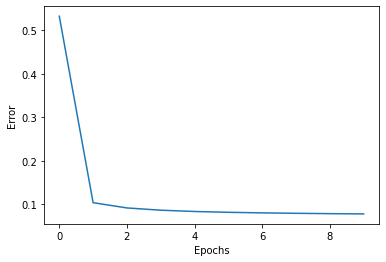

In [29]:
import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(error)
plt.show()

In [30]:
def calculate_output(instance):
  hidden_layer = sigmoid(np.dot(instance, weights0))
  output_layer = sigmoid(np.dot(hidden_layer, weights1))
  return output_layer[0]

In [31]:
inputs[0], outputs[0]

(array([0.9231759 , 0.95743135, 0.58883739]), array([0], dtype=int64))

In [32]:
round(calculate_output(inputs[0]))

0

In [33]:
inputs[4], outputs[4]

(array([0.93911717, 0.61005687, 0.63704537]), array([1], dtype=int64))

In [34]:
round(calculate_output(inputs[4]))

1